<a href="https://colab.research.google.com/github/dAn-solution/competition/blob/main/Signate_beginner_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 【第19回_Beginner限定コンペ】国勢調査からの収入予測
- 教育年数や職業等の国勢調査データから年収が$50,000ドルを超えるかどうかを予測しよう。
- EDA

### Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'

Mounted at /content/drive
/content/drive/My Drive


### ライブラリのインストール、インポート

In [ ]:
# カレントディレクトリを変更
import os
os.chdir('/content/drive/My Drive/signate/Beginner-19/')
print(os.getcwd())

/content/drive/My Drive/signate/Beginner-19


In [ ]:
class Config():
    root_path = './'
    input_path = os.path.join(root_path, 'input')
    output_path = os.path.join(root_path, 'output')
    seed = 42
    debug = False

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

### データの読み込み

In [ ]:
train_df = pd.read_csv(f'{Config.input_path}/train.csv')
test_df = pd.read_csv(f'{Config.input_path}/test.csv')
sample_df = pd.read_csv(f'{Config.input_path}/sample_submit.csv', header=None)

In [ ]:
print(len(train_df))
print(len(test_df))
print(len(sample_df))

10200
6800
6800


## EDAの実施

In [ ]:
test_df

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,10200,30,Private,132646,HS-grad,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,10201,30,Private,132626,HS-grad,4,Never-married,Sales,Wife,White,Female,United-States
2,10202,36,Private,132505,Bachelors,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,10203,23,Private,132610,HS-grad,9,Divorced,?,Not-in-family,White,Female,United-States
4,10204,36,Private,132468,12th,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,16995,31,Private,132530,Some-college,9,Divorced,Handlers-cleaners,Not-in-family,White,Female,United-States
6796,16996,31,Private,132634,Bachelors,6,Never-married,Transport-moving,Not-in-family,Asian-Pac-Islander,Male,United-States
6797,16997,31,Private,132598,HS-grad,13,Widowed,Farming-fishing,Not-in-family,White,Male,United-States
6798,16998,23,Private,132573,Some-college,8,Divorced,?,Not-in-family,Black,Female,United-States


In [ ]:
train_df.head()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,0,22,Private,132618,Some-college,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,1,22,Private,132655,Bachelors,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,2,23,?,132674,HS-grad,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,3,36,Private,132642,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,4,49,Private,132646,Assoc-voc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1


In [ ]:
len(train_df)

10200

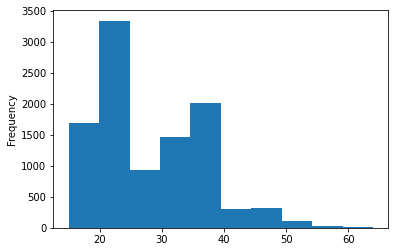

In [ ]:
train_df['age'].plot(kind='hist')

In [ ]:
print(train_df['workclass'].unique())
print(len(train_df['workclass'].unique()))

['Private' '?' 'Local-gov' 'Self-emp-inc' 'Federal-gov' 'Self-emp-not-inc'
 'State-gov']
7


In [ ]:
len(train_df[train_df['workclass']=='?'])

695

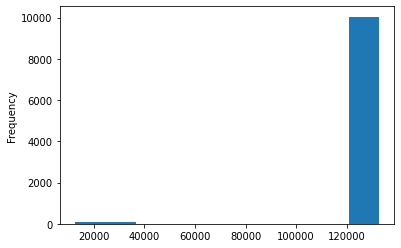

In [ ]:
train_df['fnlwgt'].plot(kind='hist')

In [ ]:
len(train_df['fnlwgt'].unique())

535

In [ ]:
print(train_df['education'].unique())
print(len(train_df['education'].unique()))

['Some-college' 'Bachelors' 'HS-grad' 'Assoc-voc' '12th' '10th' 'Masters'
 '5th-6th' 'Assoc-acdm' 'Prof-school' '7th-8th' '11th' '9th' '1st-4th']
14


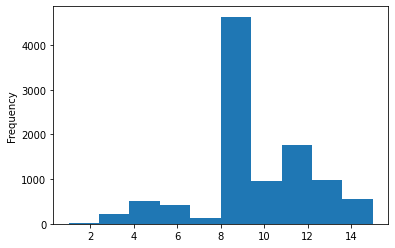

In [ ]:
train_df['education-num'].plot(kind='hist')

In [ ]:
train_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated',
       'Widowed'], dtype=object)

In [ ]:
print(train_df['occupation'].unique())
print(len(train_df['occupation'].unique()))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

['Tech-support' 'Farming-fishing' 'Other-service' 'Sales'
 'Exec-managerial' 'Protective-serv' 'Adm-clerical' 'Prof-specialty'
 'Handlers-cleaners' 'Craft-repair' '?' 'Machine-op-inspct'
 'Transport-moving']
13


In [ ]:
print(len(train_df[train_df['occupation']=='?']))

832


In [ ]:
print(train_df['relationship'].unique())

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


In [ ]:
print(train_df['race'].unique())

['White' 'Asian-Pac-Islander' 'Black']


In [ ]:
print(train_df['sex'].unique())

['Female' 'Male']


In [ ]:
print(train_df['native-country'].unique())

['United-States' 'Mexico' 'Philippines']


In [ ]:
test_df.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,10200,30,Private,132646,HS-grad,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,10201,30,Private,132626,HS-grad,4,Never-married,Sales,Wife,White,Female,United-States
2,10202,36,Private,132505,Bachelors,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,10203,23,Private,132610,HS-grad,9,Divorced,?,Not-in-family,White,Female,United-States
4,10204,36,Private,132468,12th,9,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [ ]:
sample_df.head()

,0,1
0,10200,0
1,10201,0
2,10202,0
3,10203,0
4,10204,0


In [ ]:
education_col = train_df['education'].unique()
sum_tmp = 0
len_tmp = 0
for col in education_col:
    train_tmp = train_df[train_df['education']==col]
    sum_tmp += train_tmp['Y'].sum() / len(train_df) * 100
    print(col, train_tmp['Y'].sum() / len(train_df) * 100)
    len_tmp += len(train_tmp)
print(sum_tmp)
print(len_tmp)

Some-college 0.8725490196078431
Bachelors 10.774509803921568
HS-grad 5.509803921568627
Assoc-voc 0.5294117647058824
12th 0.4607843137254902
10th 0.24509803921568626
Masters 2.686274509803922
5th-6th 0.3235294117647059
Assoc-acdm 1.0980392156862746
Prof-school 0.9901960784313725
7th-8th 0.29411764705882354
11th 0.18627450980392157
9th 0.18627450980392157
1st-4th 0.0588235294117647
24.215686274509807
10200


In [ ]:
train_y = train_df[train_df['Y']==1]

In [ ]:
race_col = train_df['race'].unique()
sum_tmp = 0
len_tmp = 0
for col in race_col:
    train_tmp = train_df[train_df['race']==col]
    sum_tmp += train_tmp['Y'].sum() / len(train_df) * 100
    print(col, train_tmp['Y'].sum() / len(train_df) * 100)
    len_tmp += len(train_tmp)
print(sum_tmp)
print(len_tmp)
print(len(train_df[train_df['race']=='White']))

White 22.558823529411764
Asian-Pac-Islander 1.3235294117647058
Black 0.33333333333333337
24.215686274509803
10200
8678


In [ ]:
education_col = train_df['education'].unique()
train_white = train_df[train_df['race']=='White']
sum_tmp = 0
len_tmp = 0
result_tmp = 0
for col in education_col:
    train_tmp = train_white[train_white['education']==col]
    sum_tmp += train_tmp['Y'].sum() / len(train_white) * 100
    print(col, train_tmp['Y'].sum() / len(train_white) * 100, train_tmp['Y'].sum())
    result_tmp += train_tmp['Y'].sum()
    len_tmp += len(train_tmp)
print(sum_tmp)
print(len_tmp)
print(result_tmp)

Some-college 0.9103480064530998 79
Bachelors 11.58100944918184 1005
HS-grad 6.176538372896981 536
Assoc-voc 0.587693016824153 51
12th 0.5185526619036644 45
10th 0.28808481216870246 25
Masters 2.926941691634017 254
5th-6th 0.36874855957593916 32
Assoc-acdm 1.2330029960820466 107
Prof-school 1.1177690712145656 97
7th-8th 0.33417838211569484 29
11th 0.20742106476146577 18
9th 0.20742106476146577 18
1st-4th 0.057616962433740496 5
26.515326112007376
8678
2301


In [ ]:
print(len(train_df[train_df['race']=='White']) / len(train_df))
print(len(train_df[train_df['race']=='Asian-Pac-Islander']) / len(train_df))
print(len(train_df[train_df['race']=='Black']) / len(train_df))

0.8507843137254902
0.04
0.10921568627450981


In [ ]:
print(len(train_y))
print(len(train_y)/len(train_df))
print(len(train_y['education']) / len(train_df))

2470
0.24215686274509804
0.24215686274509804


In [ ]:
print(len(train_df))
print(len(train_df[train_df['Y']==0]))
print(len(train_df[train_df['Y']==1]))

10200
7730
2470


In [ ]:
col_tmp = 'workclass'
tmp_col = train_df[col_tmp].unique()
sum_tmp = 0
len_tmp = 0
for col in tmp_col:
    train_tmp = train_df[train_df[col_tmp]==col]
    sum_tmp += train_tmp['Y'].sum() / len(train_df) * 100
    print(col, train_tmp['Y'].sum() / len(train_df) * 100)
    len_tmp += len(train_tmp)
print(sum_tmp)
print(len_tmp)

Private 10.0
? 0.5392156862745098
Local-gov 3.7254901960784315
Self-emp-inc 1.803921568627451
Federal-gov 0.33333333333333337
Self-emp-not-inc 6.411764705882353
State-gov 1.4019607843137254
24.215686274509803
10200


In [ ]:
not_col = ['index', 'fnlwgt', 'age']
for col in train_df.columns:
    if col not in not_col:
        unique_val = train_df[col].unique()
        for val in unique_val:
            df_tmp = train_df[train_df[col]==val]
            print(col, val, df_tmp['Y'].sum(), df_tmp['Y'].sum()/train_df['Y'].sum()*100)

workclass Private 1020 41.29554655870445
workclass ? 55 2.2267206477732793
workclass Local-gov 380 15.384615384615385
workclass Self-emp-inc 184 7.449392712550608
workclass Federal-gov 34 1.376518218623482
workclass Self-emp-not-inc 654 26.477732793522268
workclass State-gov 143 5.7894736842105265
education Some-college 89 3.6032388663967607
education Bachelors 1099 44.49392712550607
education HS-grad 562 22.753036437246962
education Assoc-voc 54 2.186234817813765
education 12th 47 1.9028340080971662
education 10th 25 1.0121457489878543
education Masters 274 11.093117408906883
education 5th-6th 33 1.3360323886639678
education Assoc-acdm 112 4.534412955465587
education Prof-school 101 4.089068825910931
education 7th-8th 30 1.214574898785425
education 11th 19 0.7692307692307693
education 9th 19 0.7692307692307693
education 1st-4th 6 0.24291497975708504
education-num 12 605 24.493927125506072
education-num 9 268 10.850202429149798
education-num 8 265 10.728744939271255
education-num 13 55

In [ ]:
train_df

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,0,22,Private,132618,Some-college,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,1,22,Private,132655,Bachelors,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,2,23,?,132674,HS-grad,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,3,36,Private,132642,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,4,49,Private,132646,Assoc-voc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,31,Private,132650,Bachelors,9,Divorced,Craft-repair,Other-relative,White,Female,Mexico,0
10196,10196,36,Private,132590,HS-grad,9,Married-civ-spouse,Exec-managerial,Unmarried,White,Male,Mexico,0
10197,10197,36,Local-gov,132498,Bachelors,13,Married-civ-spouse,?,Husband,Black,Male,United-States,0
10198,10198,17,Private,132614,Some-college,9,Never-married,?,Not-in-family,White,Female,United-States,0
